#  Titanic Survival Prediction using Machine Learning
This notebook walks through a full machine learning pipeline for predicting survival on the Titanic dataset.

## 1. Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


## 2.  Load Dataset

In [2]:

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.  Data Exploration

In [3]:

print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## 4.  Data Visualization

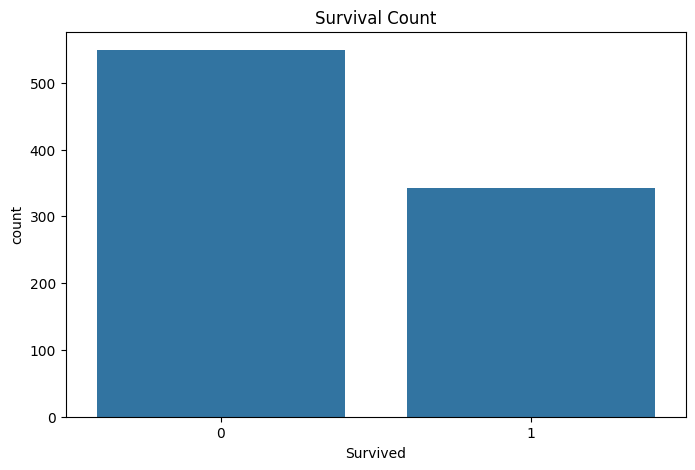

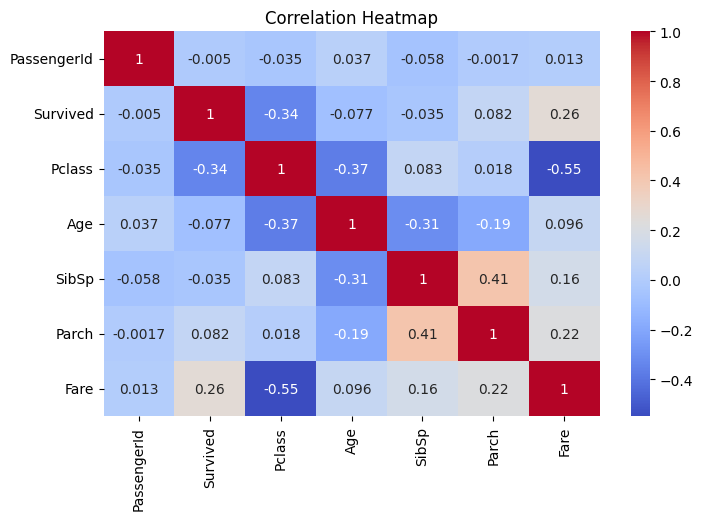

In [4]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [23]:
numerical = df.select_dtypes(exclude="object").columns
numerical

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

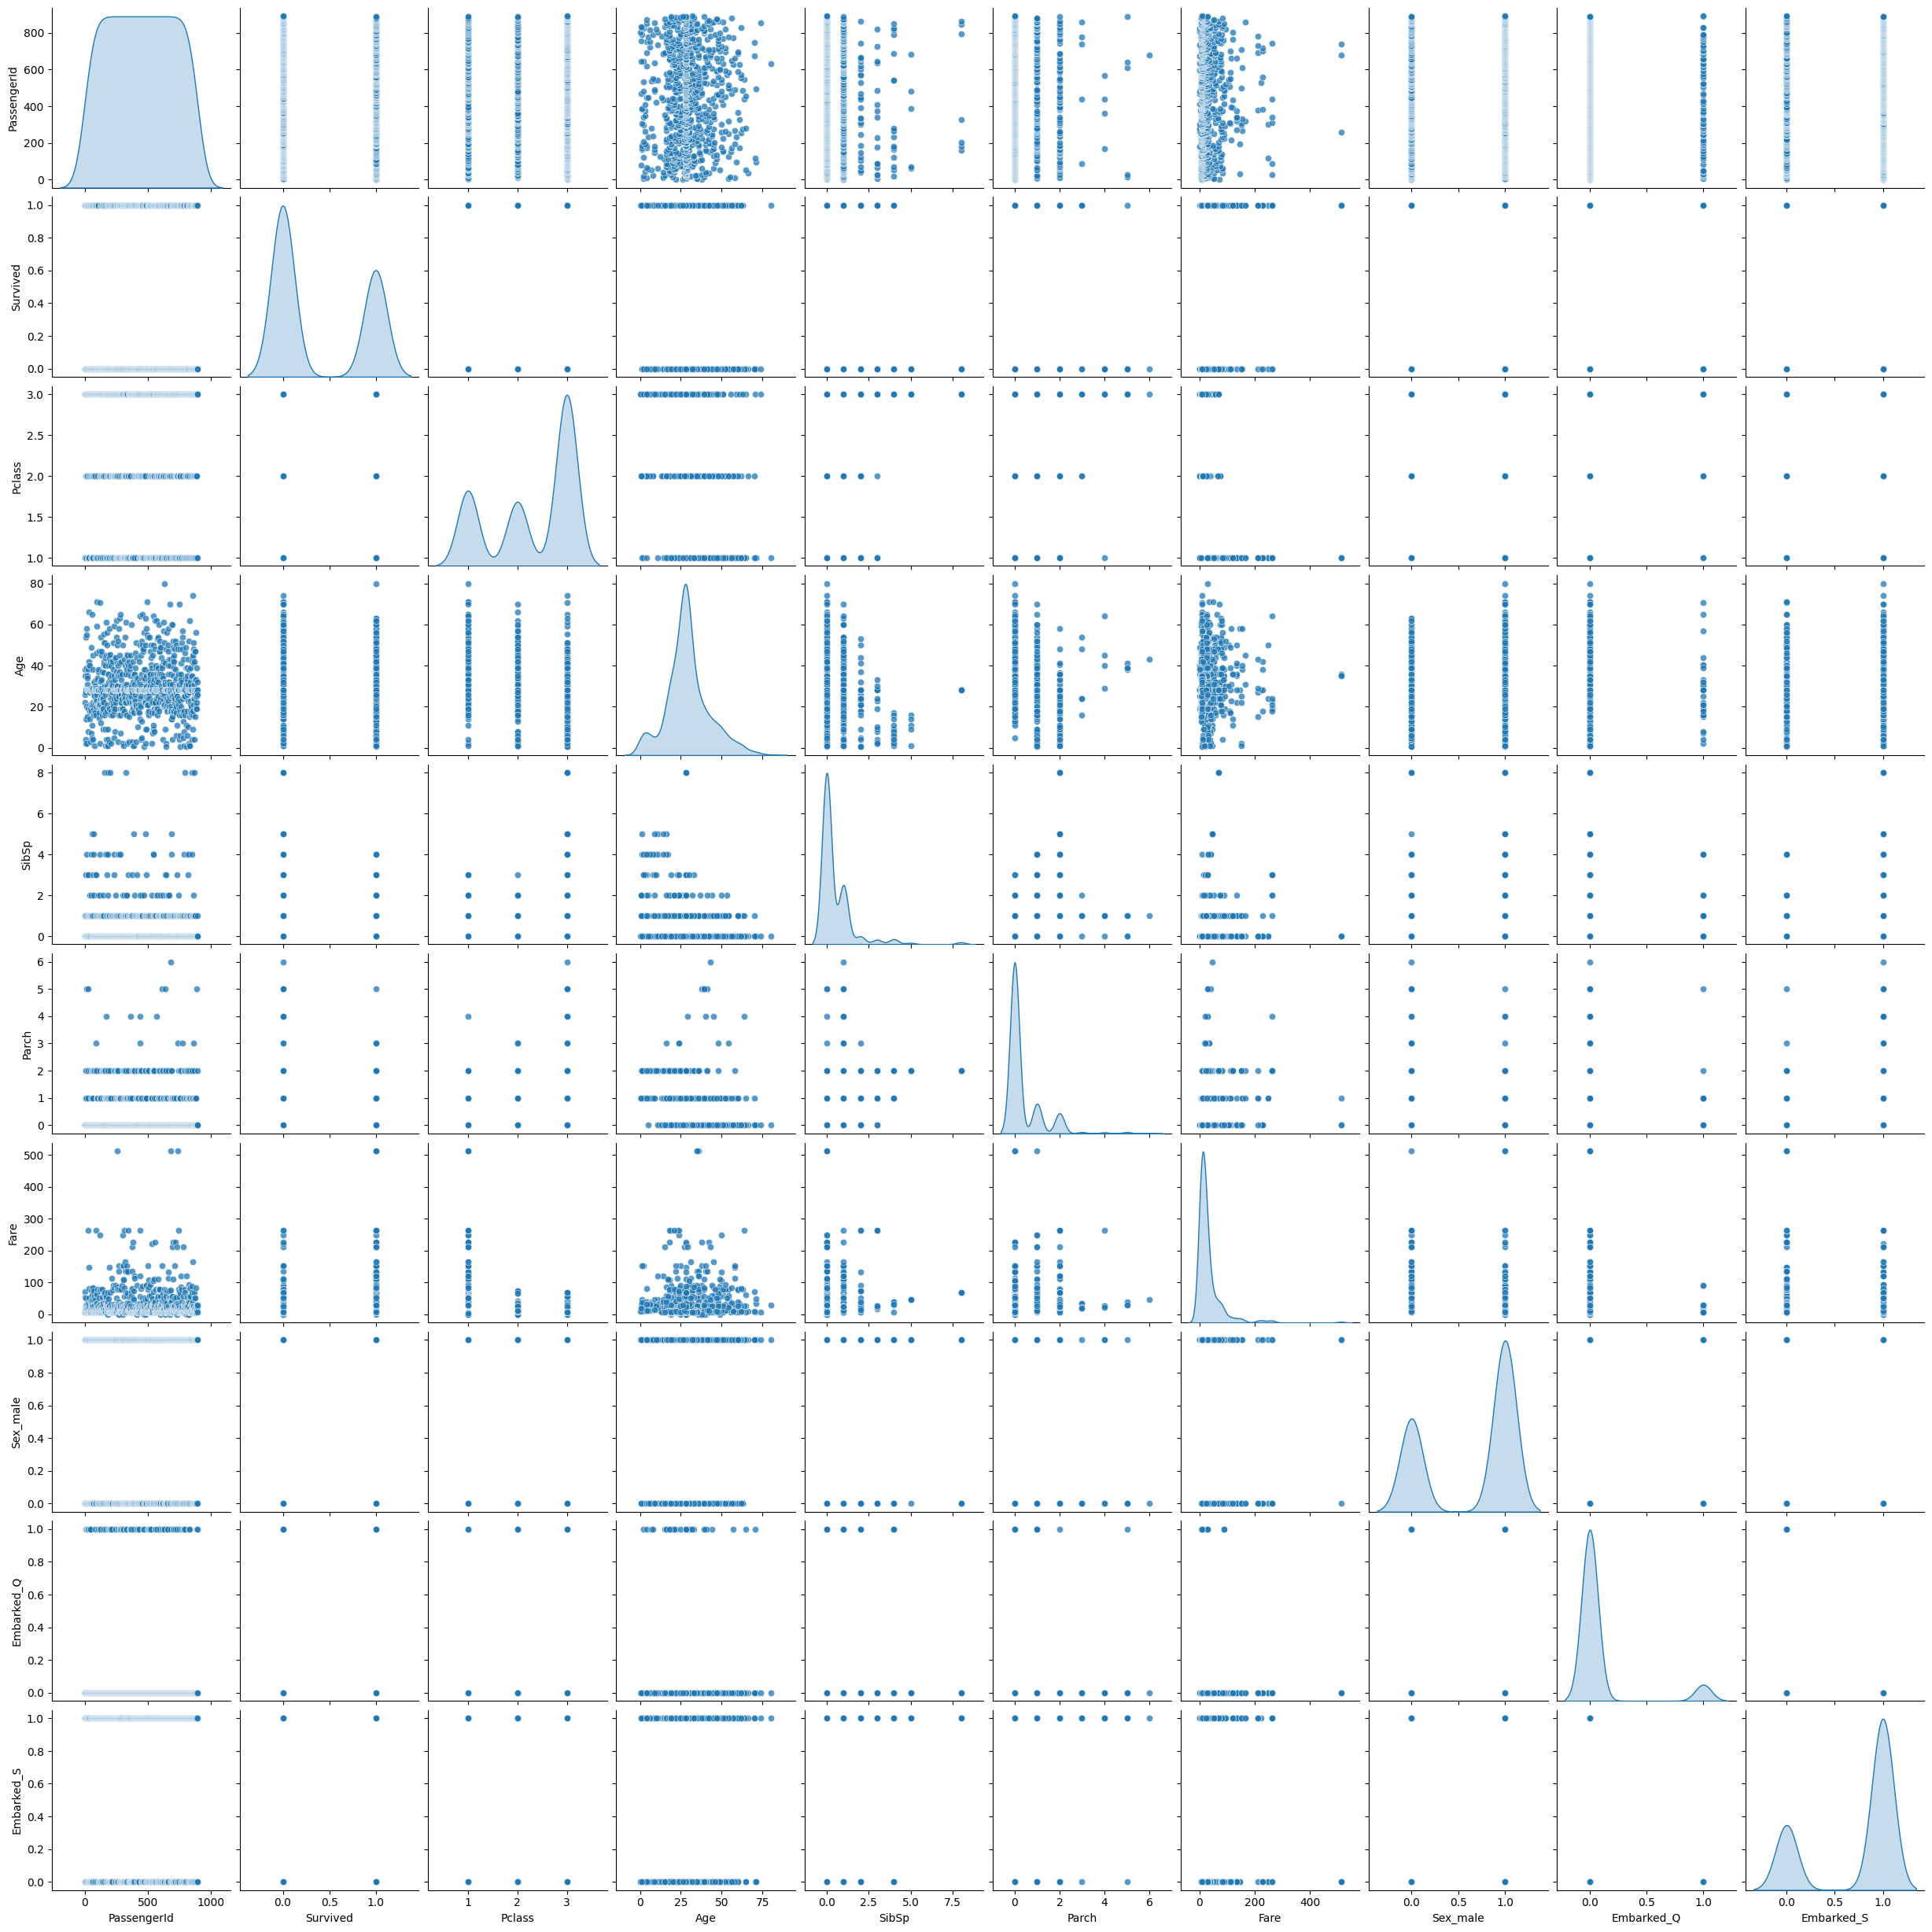

In [24]:
sns.pairplot(df[numerical], diag_kind='kde', plot_kws={'alpha': 0.75})
plt.show()


In [20]:
def visulization(feature):

    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    sns.histplot(data=df ,x=feature , kde=True , color="r")
    plt.xlabel(feature ,fontsize=10 ,weight="bold" )
    plt.ylabel("frequency" ,fontsize=10 ,weight="bold" )

    plt.subplot(1,3,2)
    sns.boxplot(data= df , x=feature,palette="crest")
    plt.xlabel(feature ,fontsize=10 ,weight="bold" )
    plt.ylabel("frequency" ,fontsize=10 ,weight="bold" )

    plt.subplot(1,3,3)
    sns.stripplot(data=df , x=feature,color="b")
    plt.xlabel(feature ,fontsize=10 ,weight="bold" )
    plt.ylabel("frequency" ,fontsize=10,weight="bold" )
    plt.suptitle(feature, weight="bold", fontsize=18, color='orange')

    plt.show()

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


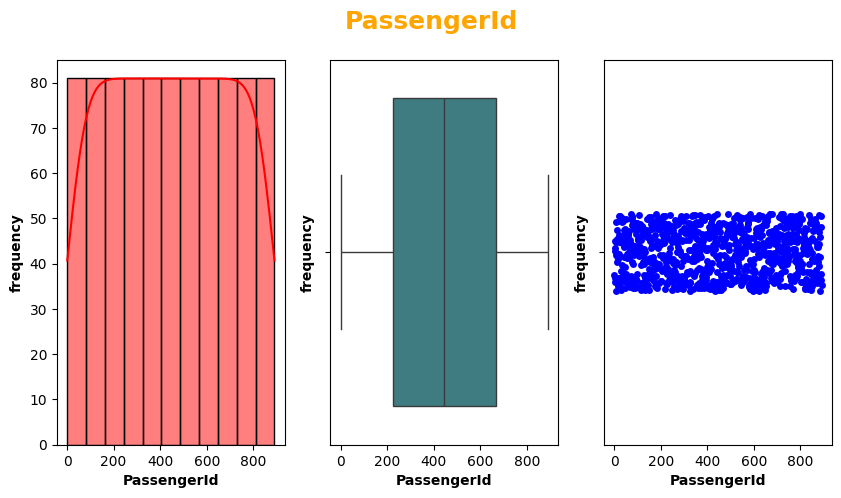

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


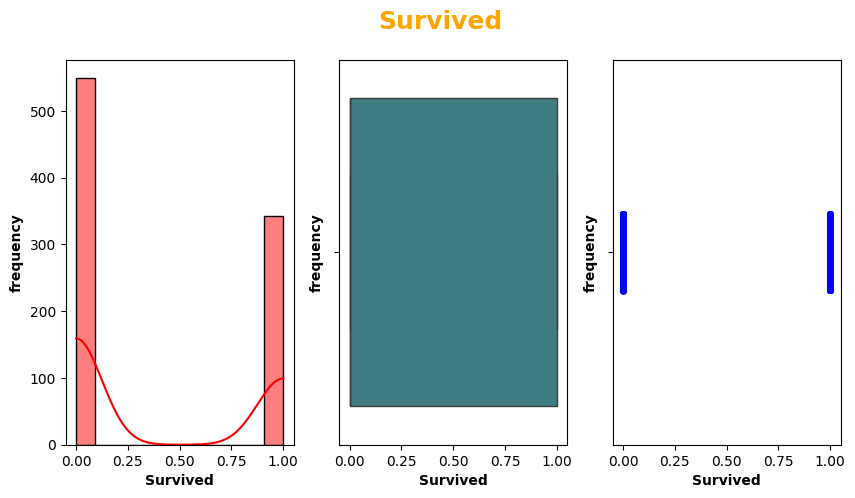

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


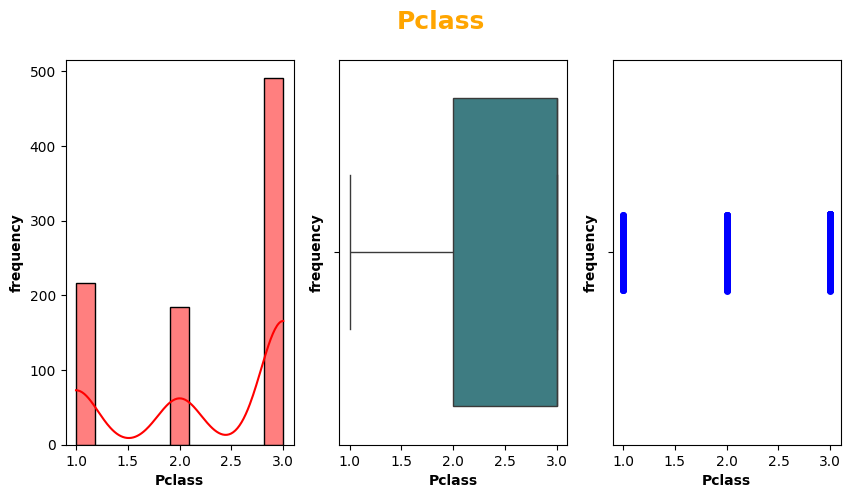

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


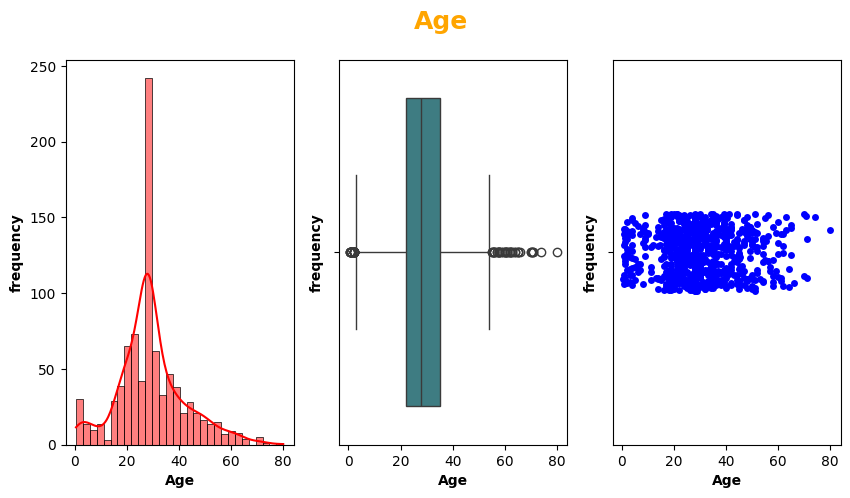

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


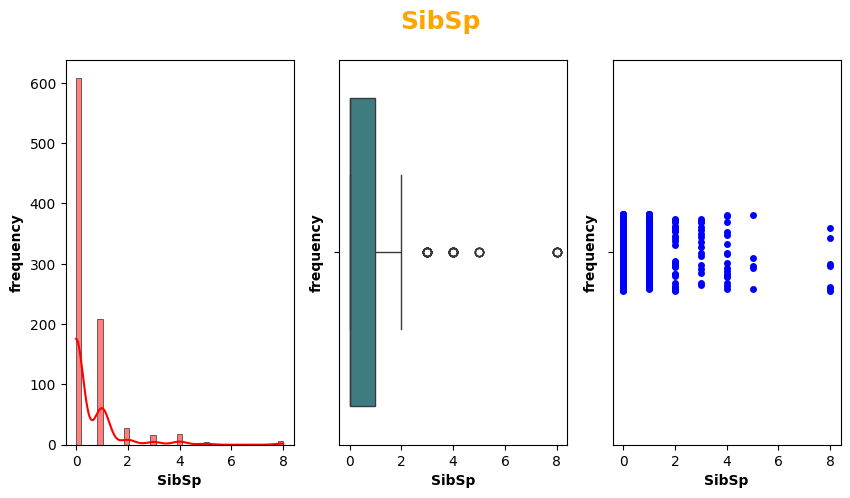

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


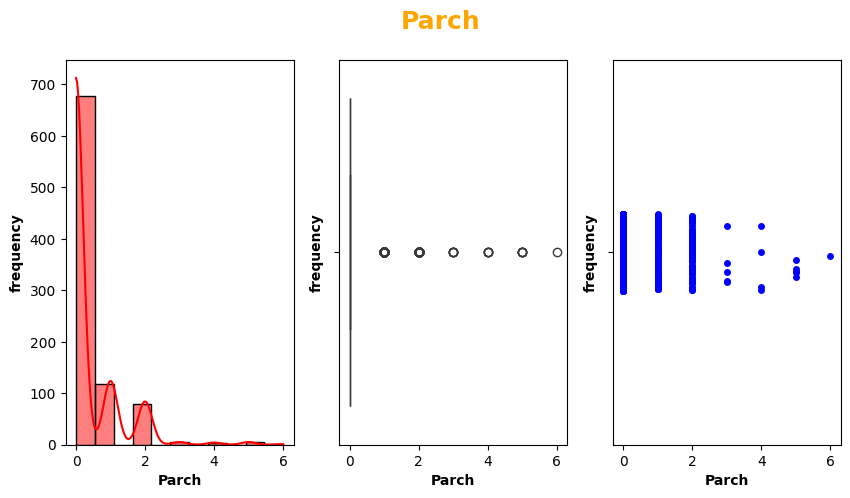

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


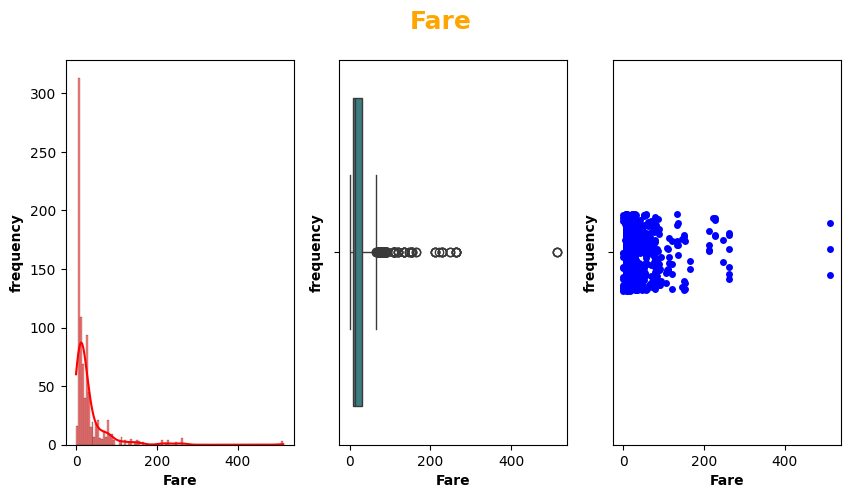

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


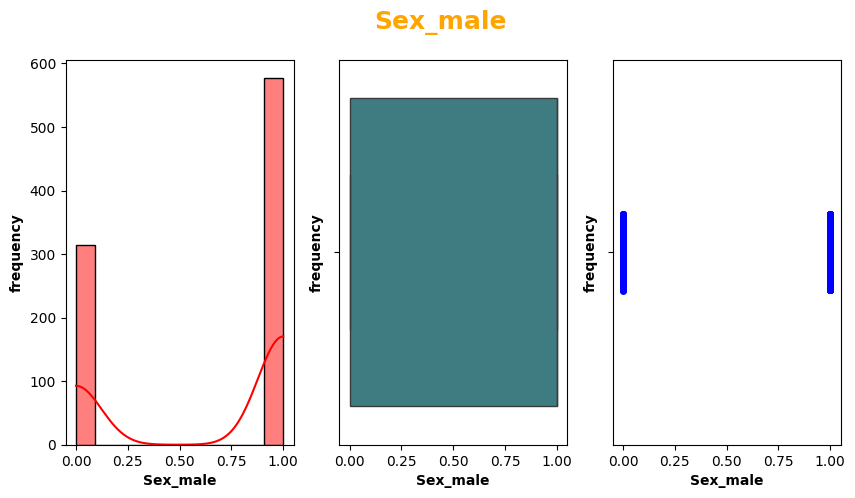

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


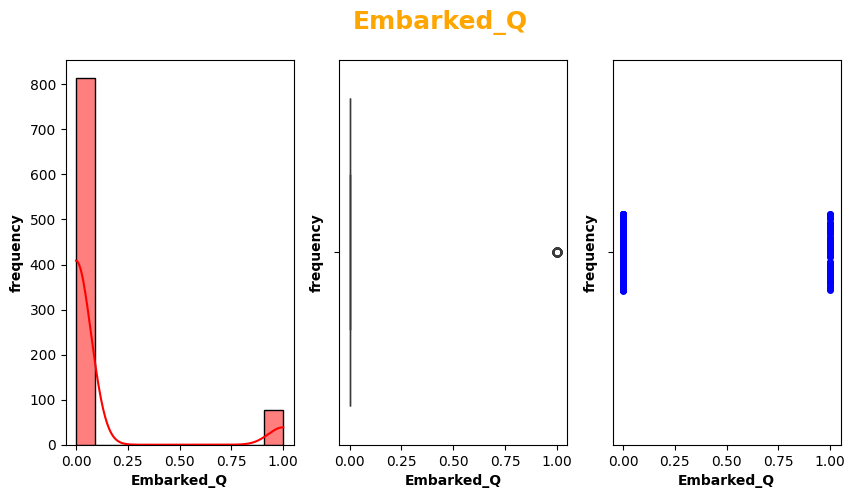

<ipython-input-20-59b0f55947b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df , x=feature,palette="crest")


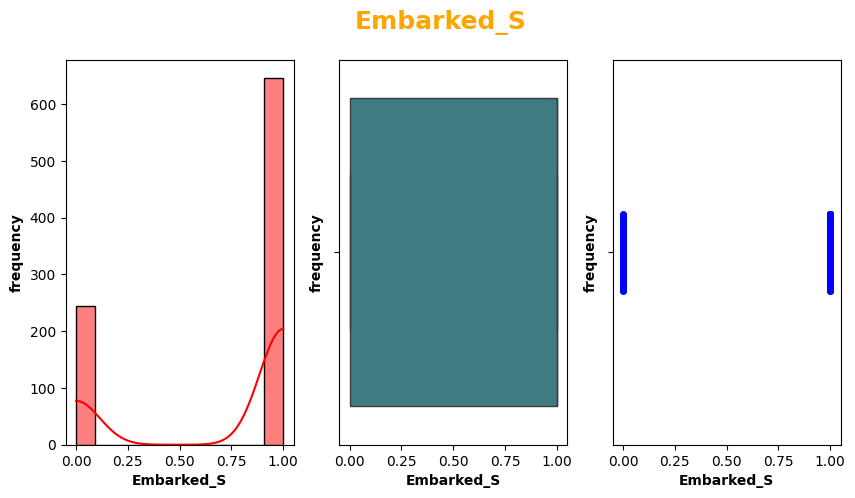

In [21]:
features = df.select_dtypes(exclude="object").columns
for feature in features :
    visulization(feature)

## 5.  Data Preprocessing

In [5]:

df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


<ipython-input-5-cbd38f822e44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-cbd38f822e44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## 6.  Split Features and Target

In [6]:

X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 7.  Model Training & Evaluation

In [7]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[89 16]
 [19 55]]

Decision Tree Results:
Accuracy: 0.7430167597765364
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       105
           1       0.69      0.69      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179

Confusion Matrix:
 [[82 23]
 [23 51]]

Random Forest Results:
Accuracy: 0.8268156424581006
Classification Report:
               precision    recall

## 8.  Hyperparameter Tuning - Random Forest

In [8]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
try:
    print("ROC AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))
except:
    pass


Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[94 11]
 [23 51]]
ROC AUC Score: 0.8855855855855856


##  Conclusion

Random Forest performed the best among all tested models. After tuning, the performance was further improved. This pipeline demonstrates a complete classification workflow using Python and scikit-learn.